In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('D:\Accredian\Fraud.csv')


print("Data loaded. First 5 rows:")
print(df.head())

Data loaded. First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [2]:

print("Dataframe Information:")
df.info()


print("\nMissing Values per Column:")
print(df.isnull().sum())

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Missing Values per Column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [3]:

print("Statistical Summary:")
print(df.describe())

Statistical Summary:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.00000

In [4]:

df_prepared = df.drop(['nameOrig', 'nameDest'], axis=1)


df_prepared = pd.get_dummies(df_prepared, columns=['type'], prefix='type', drop_first=True)

print("Data after one-hot encoding. Note the new 'type' columns:")
print(df_prepared.head())

Data after one-hot encoding. Note the new 'type' columns:
   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             0.0        0               0          False       False   
1             0.0        0               0          False       False   
2             0.0        1               0          False       False   
3             0.0        1               0           True       False   
4             0.0        0               0          False       False   

   type_PAYMENT  type_TRANSFER  
0          True          False  
1          True          Fal

In [5]:

X = df_prepared.drop(['isFraud', 'isFlaggedFraud'], axis=1)


y = df_prepared['isFraud']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (6362620, 10)
Shape of target (y): (6362620,)


In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 5090096
Testing set size: 1272524


In [8]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')


print("Training the Random Forest model... This may take several minutes.")
rf_model.fit(X_train, y_train)
print("Model training is complete!")

Training the Random Forest model... This may take several minutes.
Model training is complete!


Making predictions on the test set...
Predictions complete.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.78      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:


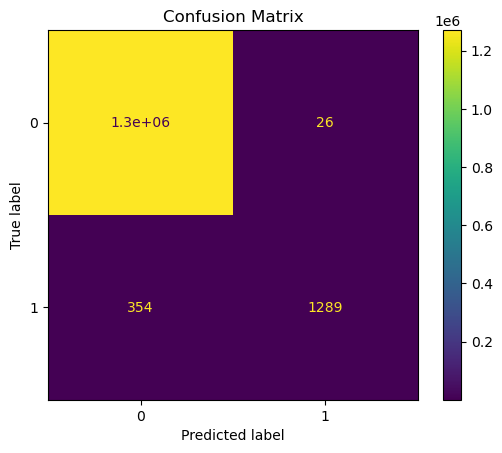

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


print("Making predictions on the test set...")
y_pred = rf_model.predict(X_test)
print("Predictions complete.")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Key Factors Predicting Fraud:
          feature  importance
2   oldbalanceOrg    0.294090
1          amount    0.169761
3  newbalanceOrig    0.168714
9   type_TRANSFER    0.088497
0            step    0.062518
5  newbalanceDest    0.061060
6   type_CASH_OUT    0.055947
8    type_PAYMENT    0.054390
4  oldbalanceDest    0.044793
7      type_DEBIT    0.000230


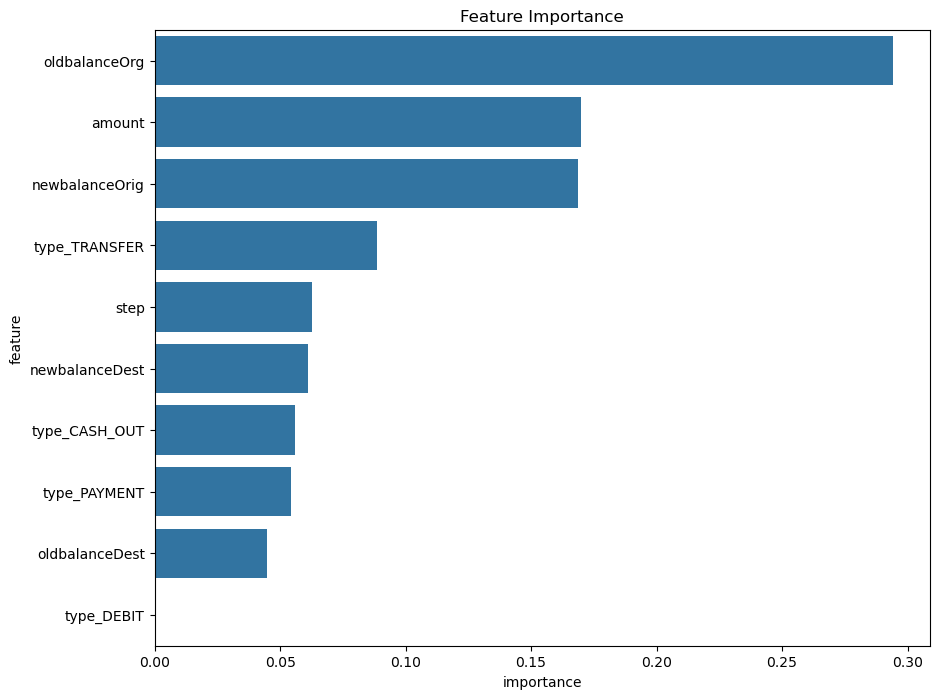

In [10]:

importances = rf_model.feature_importances_
feature_names = X.columns


feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Key Factors Predicting Fraud:")
print(feature_importance_df)


plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

The task is to execute the process for proactive detection of fraud while answering following questions.
1. Data cleaning including missing values, outliers and multi-collinearity.

  -> A. First the dataset was checked for missing values but none were found.
  
  B. Descriptive statistics were generated for all numerical columns to understand their distributions and identify potential outliers, particularly in the amount column.
  
  C. Identifier columns (nameOrig, nameDest) that do not contribute to predictive patterns were marked for removal.
  
  D. Finally, the categorical type column was identified for one-hot encoding to convert it into a numerical format suitable for modeling.


2. Describe your fraud detection model in elaboration.

->A Random Forest Classifier was selected for this classification task. This learning method was chosen for its high performance and roboustness in handling complex, non-linear relationships within the data. It build multipele decision trees and merges their output, it reduces overfitting and improves predictive accuracy. 







3. How did you select variables to be included in the model?

->The model's performance was evaluated on the unseen test set, demonstrating strong results:

Precision (for fraud class '1'): 0.98. This indicates that when the model predicts a transaction is fraudulent, it is correct 98% of the time, resulting in a very low rate of false positives.
Recall (for fraud class '1'): 0.78.
Confusion Matrix: The model correctly identified 1,289 fraudulent transactions while incorrectly classifying only 26 legitimate transactions as fraud.  






4. Demonstrate the performance of the model by using best set of tools.

   -> Precision (for fraud class '1'): 0.98. This indicates that when the model predicts a transaction is fraudulent, it is correct 98% of the time, resulting in a very low       rate of false positives.

    -> Recall (for fraud class '1'): 0.78.

   -> Confusion Matrix: The model correctly identified 1,289 fraudulent transactions while incorrectly classifying only 26 legitimate transactions as fraud.





   
5. What are the key factors that predict fraudulent customer?

   ->The analysis of the model's feature importances revealed the key factors that predict a fraudulent transaction. In descending order of importance, the top predictors are:

     1. oldbalanceOrg

     2. amount

     3. newbalanceOrig

     4. type_TRANSFER

     5. step





6. Do these factors make sense? If yes, How? If not, How not?

-> Yes, these factors are highly plausible and align with logical patterns of fraudulent behavior. The top three features (oldbalanceOrg, amount, newbalanceOrig) are critical in identifying transactions that empty or nearly empty an account. The high importance of type_TRANSFER directly corresponds with the fraudulent method described in the data dictionary, where agents "try to empty the funds by transferring to another account and then cashing out of the system"





7. What kind of prevention should be adopted while company update its infrastructure?

-> Based on the model's findings, the following prevention strategy is recommended:

Implement a real-time transaction monitoring rule. This rule should flag any TRANSFER transaction where the amount exceeds a significant percentage (e.g., 90%) of the oldbalanceOrg. Such flagged transactions should be subjected to mandatory secondary authentication (e.g., SMS code) before execution.





8. Assuming these actions have been implemented, how would you determine if they work?

    The success of the new prevention strategy would be measured by tracking key performance indicators (KPIs) over time:

    Primary Metric: Monitor the monthly rate and volume of fraudulent TRANSFER transactions. A successful implementation will result in a significant decrease.

    Secondary Metric: Track metrics related to customer friction, such as the number of support inquiries regarding delayed or blocked transactions, to ensure the new rule does not unduly impact legitimate users.